<a href="https://colab.research.google.com/github/samuel1sm/Project_MPCE/blob/main/extra%C3%A7%C3%A3o%20de%20arquivos/IndentifyCNH.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!apt-get install tesseract-ocr tesseract-ocr-por
!apt-get install python-dev python3-dev build-essential liblcms2-dev zlib1g-dev libtiff5-dev libjpeg8-dev libfreetype6-dev libwebp-dev
!pip install Pillow
!pip install pytesseract

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following additional packages will be installed:
  tesseract-ocr-eng tesseract-ocr-osd
The following NEW packages will be installed:
  tesseract-ocr tesseract-ocr-eng tesseract-ocr-osd tesseract-ocr-por
0 upgraded, 4 newly installed, 0 to remove and 21 not upgraded.
Need to get 5,650 kB of archives.
After this operation, 17.8 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic/universe amd64 tesseract-ocr-eng all 4.00~git24-0e00fe6-1.2 [1,588 kB]
Get:2 http://archive.ubuntu.com/ubuntu bionic/universe amd64 tesseract-ocr-osd all 4.00~git24-0e00fe6-1.2 [2,989 kB]
Get:3 http://archive.ubuntu.com/ubuntu bionic/universe amd64 tesseract-ocr amd64 4.00~git2288-10f4998a-2 [218 kB]
Get:4 http://archive.ubuntu.com/ubuntu bionic/universe amd64 tesseract-ocr-por all 4.00~git24-0e00fe6-1.2 [856 kB]
Fetched 5,650 kB in 3s (2,022 kB/s)
Selecting previously unselected

In [ ]:
import os
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [ ]:
 import shutil
 shutil.rmtree('/imgs', ignore_errors=True)

!ln -s "/content/gdrive/My Drive/Datasets/ProjetoMPCE/TestDataset/documentos/cnh" imgs
if not os.path.exists("dataset"):
  os.mkdir("dataset")

In [ ]:
import glob 
images_path = glob.glob("imgs/*")

In [ ]:
def biggestContour(contours):
    biggest = np.array([])
    max_area = 0
    for i in contours:
        area = cv2.contourArea(i)
        if area > 5000:
            peri = cv2.arcLength(i, True)
            approx = cv2.approxPolyDP(i, 0.02 * peri, True)
            if area > max_area and len(approx) >= 4:
                # print(approx)
                biggest = np.array(approx).reshape(len(approx), 2).tolist()
                max_area = area

    if len(biggest)>=4:
        biggest.sort(key=lambda x : x[0])
        t=[biggest.pop(0),biggest.pop(-1)]
        width = t[1][0] - t[0][0]

        biggest.sort(key=lambda x : x[1])
        t.append(biggest.pop(0))
        t.append(biggest.pop(-1))


        t.sort(key=lambda x : x[1])
        t1=[t.pop(0)]
        t1.append(t.pop(0))
        t1.sort(key=lambda x : x[0])
        t.sort(key=lambda x : x[0])
        
        biggest = [t1[0],t1[1],t[0],t[1]]

        t.sort(key=lambda x : x[1])
        height = t[-1][1] - t1[0][1]

        # print(biggest)

    return biggest,width,height

In [ ]:
def dots(img,dots,ratio=1):
    for i in dots:
        print(i)
        p1,p2=i
        img = cv2.circle(img,(int(p1/ratio),int(p2/ratio)), 3, (0,0,255), thickness=3)
    # cv2_imshow(imutils.resize(img , height = 800))

In [ ]:
def four_point_transform(image, pts):
	# obtain a consistent order of the points and unpack them
	# individually
	#rect = order_points(pts)
	(tl, tr, br, bl) = pts
	# compute the width of the new image, which will be the
	# maximum distance between bottom-right and bottom-left
	# x-coordiates or the top-right and top-left x-coordinates
	widthA = np.sqrt(((br[0] - bl[0]) ** 2) + ((br[1] - bl[1]) ** 2))
	widthB = np.sqrt(((tr[0] - tl[0]) ** 2) + ((tr[1] - tl[1]) ** 2))
	maxWidth = max(int(widthA), int(widthB))
	# compute the height of the new image, which will be the
	# maximum distance between the top-right and bottom-right
	# y-coordinates or the top-left and bottom-left y-coordinates
	heightA = np.sqrt(((tr[0] - br[0]) ** 2) + ((tr[1] - br[1]) ** 2))
	heightB = np.sqrt(((tl[0] - bl[0]) ** 2) + ((tl[1] - bl[1]) ** 2))
	maxHeight = max(int(heightA), int(heightB))
	# now that we have the dimensions of the new image, construct
	# the set of destination points to obtain a "birds eye view",
	# (i.e. top-down view) of the image, again specifying points
	# in the top-left, top-right, bottom-right, and bottom-left
	# order
	dst = np.array([
		[0, 0],
		[maxWidth - 1, 0],
		[maxWidth - 1, maxHeight - 1],
		[0, maxHeight - 1]], dtype = "float32")
	# compute the perspective transform matrix and then apply it
	M = cv2.getPerspectiveTransform(rect, dst)
	warped = cv2.warpPerspective(image, M, (maxWidth, maxHeight))
	# return the warped image
	return warped

In [ ]:
from skimage.filters import threshold_local
import numpy as np
import cv2
import imutils
from google.colab.patches import cv2_imshow
from matplotlib import pyplot as plt


STEP 1: Edge Detection


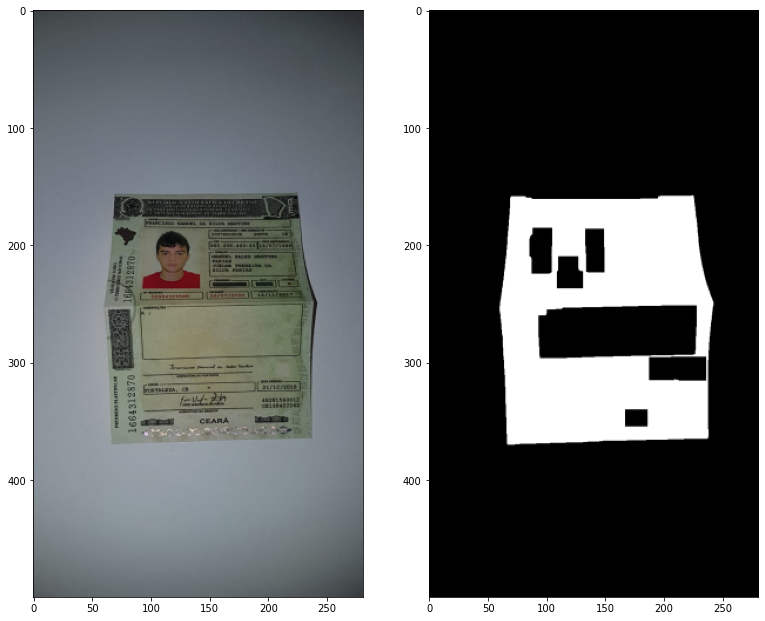

[178, 407]
[576, 404]
[171, 947]
[608, 933]
STEP 3: Apply perspective transform


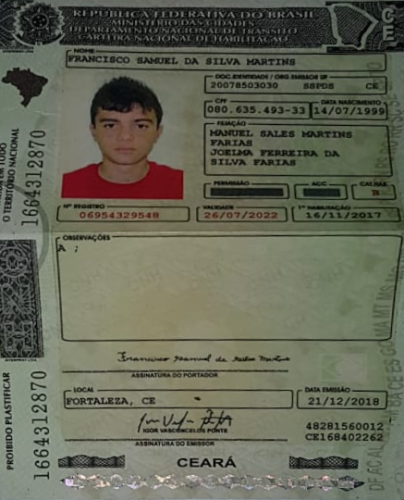

In [ ]:

fig=plt.figure(figsize=(13, 13))

plt.subplot(1,2,1)

pathImage = images_path[1]  # ok

orig  = cv2.imread(pathImage)

plt.imshow(imutils.resize(cv2.cvtColor(orig, cv2.COLOR_BGR2RGB), height = 500))

plt.subplot(1,2,2)


ratio = orig.shape[0] / 500.0
heightImg = orig.shape[0]
widthImg =  orig.shape[1]

img = orig.copy()
image = orig.copy()


gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
gray = cv2.GaussianBlur(gray, (5, 5), 0)
edged = cv2.Canny(gray,1, 200)
kernel = np.ones((5,5))
img_dilation = cv2.dilate(edged, kernel, iterations=9)
img_erosion = cv2.erode(img_dilation, kernel, iterations=9) 
# edged = cv2.Canny(img_erosion,75, 200)
edged = img_erosion
# show the original image and the edge detected image
print("STEP 1: Edge Detection")
plt.imshow(imutils.resize(cv2.cvtColor(edged, cv2.COLOR_BGR2RGB), height = 500))
plt.show()



# -----------------------------------------------
# print("STEP 2: Find contours of paper")
# cv2.drawContours(image, [screenCnt], -1, (0, 255, 0), 10)
contours, hierarchy = cv2.findContours(img_erosion, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
img= cv2.drawContours(img, contours, -1, (0, 255, 0), 20)

# cv2_imshow(img)

biggest,new_width, new_height = biggestContour(contours)
dots(imutils.resize(img, height = 500),biggest,ratio)
# print(new_width, new_height)

pts1 = np.float32(biggest) # PREPARE POINTS FOR WARP


pts2 = np.float32([[0, 0],[new_width, 0], [0, new_height],[new_width, new_height]]) # PREPARE POINTS FOR WARP
matrix = cv2.getPerspectiveTransform(pts1, pts2)
warped = cv2.warpPerspective(orig, matrix, (new_width, new_height))


# pts2 = np.float32([[0, 0],[heightImg, 0], [0, widthImg],[heightImg, widthImg]]) # PREPARE POINTS FOR WARP
# matrix = cv2.getPerspectiveTransform(pts1, pts2)
# warped = cv2.warpPerspective(orig, matrix, (heightImg,widthImg))


# warped = four_point_transform(orig.copy(), biggest.reshape(4, 2))
print("STEP 3: Apply perspective transform")

final_colored= warped.copy()
cv2_imshow(imutils.resize(final_colored, height = 500))

# cv2_imshow()


STEP 2: Find contours of paper
[[[576 404]]

 [[178 407]]

 [[171 947]]

 [[608 933]]]
[[178, 407], [576, 404], [171, 947], [608, 933]]
[178, 407]
[576, 404]
[171, 947]
[608, 933]
437 540
STEP 3: Apply perspective transform


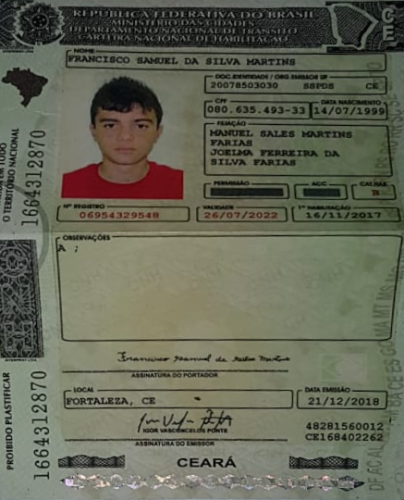

In [ ]:
print("STEP 3: Apply 'black and white' paper effect")
# warped = cv2.cvtColor(warped, cv2.COLOR_BGR2GRAY)
# T = threshold_local(warped, 11, offset = 10, method = "gaussian")
# warped = (warped > T).astype("uint8") * 255

gray = cv2.cvtColor(warped, cv2.COLOR_BGR2GRAY)
cv2_imshow(gray)
gray = cv2.GaussianBlur(gray, (5, 5), 0)
final_binary = cv2.adaptiveThreshold(gray,255,cv2.ADAPTIVE_THRESH_GAUSSIAN_C,cv2.THRESH_BINARY,35,2)
# kernel = np.ones((3,3))
final_binary = cv2.dilate(final_binary, kernel, iterations=1)
cv2_imshow(final_binary)
